<h1>LISA Spectrograph data reduction for a daytime observing run </h1>

This file contains a general data reduction pipeline for the APO LISA spectrograph for data obtained during a daytime observing run. Each cell can be run by selecting the cell and pressing <i>shit + Enter</i>. Most cells can be run without any adaptions, but others must be customized to suit your specific data. This is explained in the manual.

<strong>This notebook consists of the following sections:</strong>

<a href='#step1'>Step 1: Read in and plot the data</a><br>
<a href='#step2'>Step 2: Flatfield correction</a><br>
<a href='#step3'>Step 3: Wavelength calibration</a><br>

<h2>Before you start</h2>

Before running the data reduction pipeline in this file, the data have to be prepared in a certain way so that the pipeline can handle them. Instructions for these steps can be found in the LISA instruction manual. 

<a id='step1'></a>
<h2>Step 1: Read in and plot the data</h2>

In [11]:
# Cell 1
#
#Start with importing the necessary packages
import os
import sys
import argparse
import numpy as np
import scipy.optimize
import astropy.io.fits as pyfits
import matplotlib 
import matplotlib.pyplot as plt

# Define a function for making a logarithmic gray scale used when plotting several figures
def loggray(x, a=None, b=None):
    """
    Auxiliary function that specifies the logarithmic gray scale.
    a and b are the cutoffs : if not specified, min and max are used
    This function was provided by: 
    http://prancer.physics.louisville.edu/astrowiki/index.php/
    Image_processing_with_Python_and_SciPy#Astronomical_FITS_Files
    """
    if a == None:
        a = np.min(x)
    if b == None:
        b = np.max(x)          
    linval = 10.0 + 990.0 * (x-float(a))/(b-a)
    return (np.log10(linval)-1.0)*0.5 * 255.0

#%matplotlib notebook


# Defining general properties

# Use MaximDL or DS9 to select the pixel of the vertical middle of the frame, where the object spectrum is the strongest.
midpixel = 400

# Vertical range around midpixel where the spectrum is extracted
yrange = 300
yrange_mid = yrange/2

# Main data directory (don't use \ in the name, always use /)
directory = "/Users/nikitasfilosofof/Desktop/Astronomy/20210923"

Averaged 40 dark frames


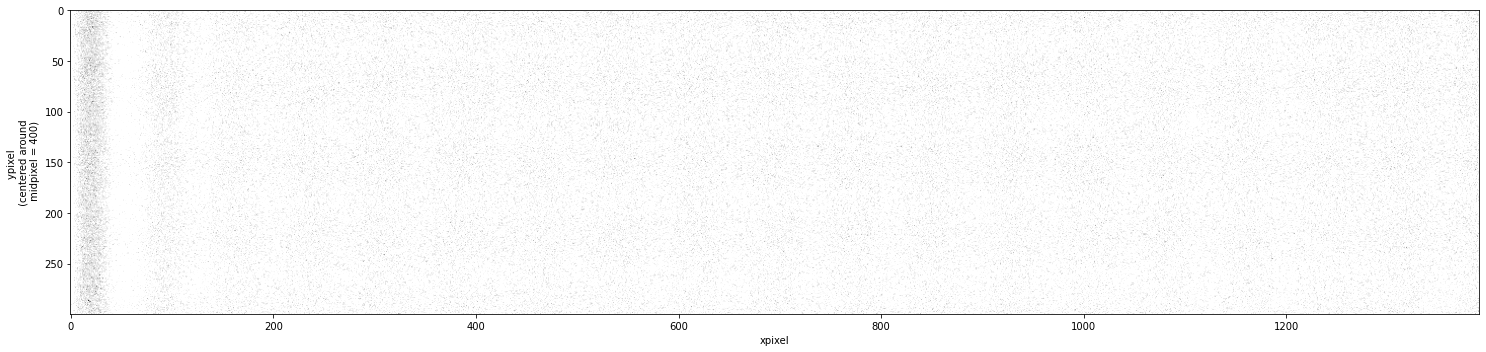

In [12]:
# Cell 2
#
# Combining and averaging all the available dark files
# Reading in the dark files; all dark files should be listed in the file "@dark.txt"

# Read in the names of all dark files
num_darkfiles = 0

darkfiles = open(directory + "/@darks_0s65.txt","r")
alldarkfiles = darkfiles.readlines( )
alldarkfiles = [x.strip() for x in alldarkfiles] # strip "\n" at the end of eachs line
num_darkfiles = len(alldarkfiles)  

print ("Averaged", num_darkfiles, "dark frames")
    
i=0
dark_data = 0.
for df in alldarkfiles:
    i += 1
    inhdulist_dark = pyfits.open(os.path.join(directory,df))
    inhdr_dark = inhdulist_dark[0].header
    dark_data += inhdulist_dark[0].data[int(midpixel-yrange_mid):int(midpixel+yrange_mid)]
 
dark_data = dark_data/i

# Show the master dark image
new_dark_data = loggray(dark_data)
new_dark_min = 0.
new_dark_max = np.mean(new_dark_data)

plt.figure(figsize=(25,5))
plt.imshow(new_dark_data, vmin = new_dark_min, vmax = new_dark_max, cmap ='gray')  
plt.xlabel('xpixel')
plt.ylabel('ypixel \n (centered around \n midpixel = {0})'.format(midpixel))
plt.tight_layout()
plt.show()  

Averaged 10 flat field frames


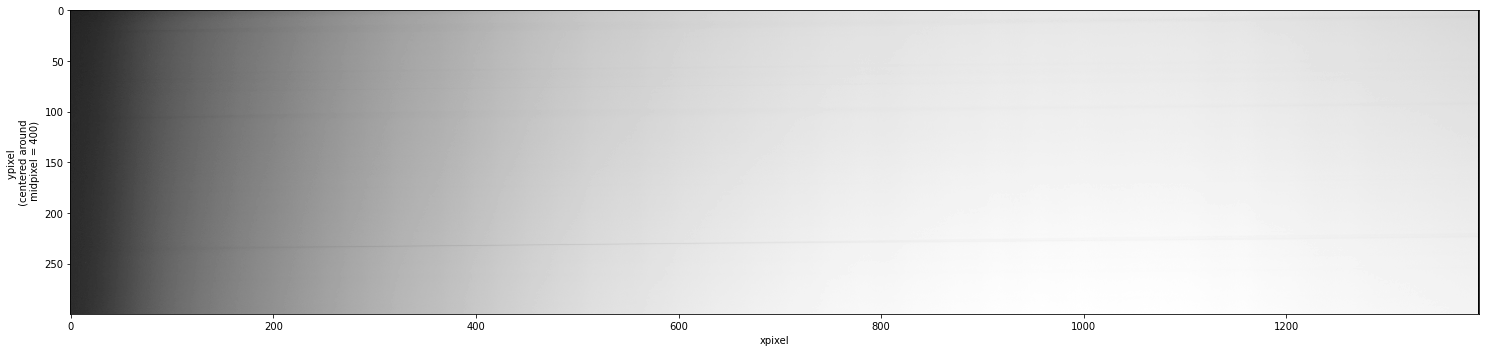

In [13]:
# Cell 3
#
# Combining and averaging all available flat field frames to create a master one
# Reading in the flat field files
# All flat field files should be listed in the file "@flat.txt"

# Read in the names of all dark files
num_flatfiles = 0
flatfiles = open(directory + "/@flat.txt","r")
allflatfiles = flatfiles.readlines( )
allflatfiles = [x.strip() for x in allflatfiles] # strip "\n" at the end of eachs line
num_flatfiles = len(allflatfiles)  

print ("Averaged", num_flatfiles, "flat field frames")
    
i=0
flat_data = 0.
for ff in allflatfiles:
    i += 1
    inhdulist_flat = pyfits.open(os.path.join(directory,ff))
    inhdr_flat = inhdulist_flat[0].header
    flat_data += inhdulist_flat[0].data[int(midpixel-yrange_mid):int(midpixel+yrange_mid)]
 
flat_data = flat_data/i


# Show the master flat image
new_flat_data = loggray(flat_data)
new_flat_min = 0.
new_flat_max = np.max(new_flat_data)


plt.figure(figsize=(25,5))
plt.imshow(new_flat_data, vmin = new_flat_min, vmax = new_flat_max, cmap ='gray')  
plt.xlabel('xpixel')
plt.ylabel('ypixel \n (centered around \n midpixel = {0})'.format(midpixel))
plt.tight_layout()
plt.show()  

Averaged 2 neon lamp spectrum frames


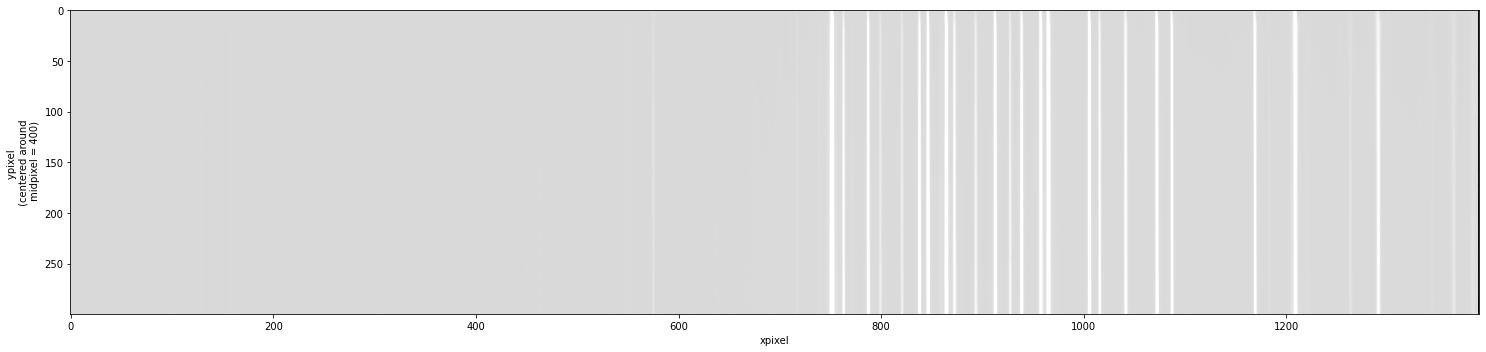

In [25]:
# Cell 4
#
# Combining and averaging all available neon lamp frames to create a master one
# Reading in the neon files
# All neon files should be listed in the file "@neon.txt"

# Read in the names of all dark files
num_neonfiles = 0
neonfiles = open(directory + "/@neon5.txt","r")
allneonfiles = neonfiles.readlines( )
allneonfiles = [x.strip() for x in allneonfiles] # strip "\n" at the end of eachs line
num_neonfiles = len(allneonfiles)  

print ("Averaged", num_neonfiles, "neon lamp spectrum frames")
    
i=0
neon_data = 0.
for nf in allneonfiles:
    i += 1
    inhdulist_wav = pyfits.open(os.path.join(directory,nf))
    inhdr_wav = inhdulist_wav[0].header
    neon_data += inhdulist_wav[0].data[int(midpixel-yrange_mid):int(midpixel+yrange_mid)]
 
neon_data = neon_data/i

# Show the master neon image
new_neon_data = loggray(neon_data)
new_neon_min = 0.
new_neon_max = np.max(new_neon_data)


plt.figure(figsize=(25,5))
plt.imshow(new_neon_data, vmin = new_neon_min, vmax = new_neon_max, cmap ='gray')  
plt.xlabel('xpixel')
plt.ylabel('ypixel \n (centered around \n midpixel = {0})'.format(midpixel))
plt.tight_layout()
plt.show()  

Averaged 20 object frames


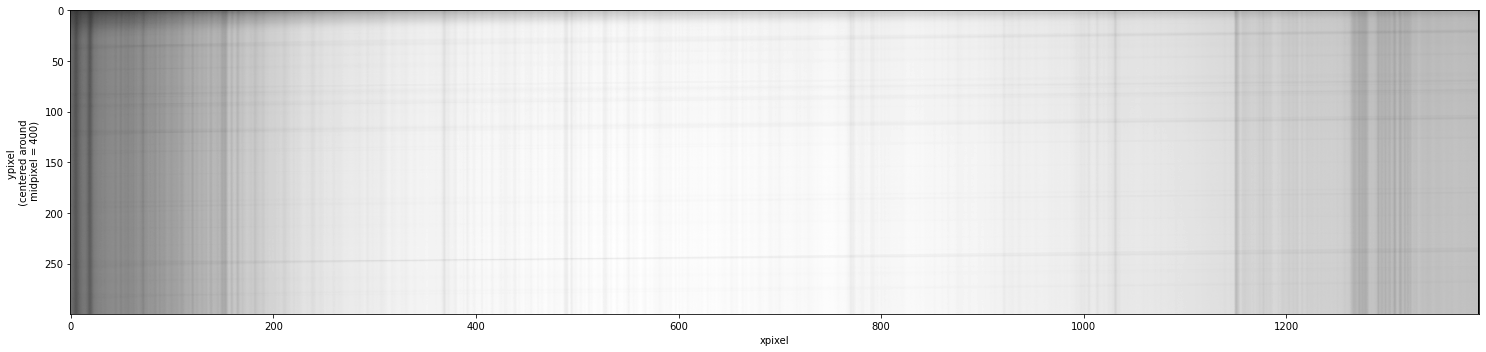

In [26]:
# Cell 5
#
# Combining and averaging all available object frames to create a master one
# Reading in the object files
# All neon files should be listed in the file "@object.txt"

# Read in the names of all dark files
num_objectfiles = 0
objectfiles = open(directory + "/@Grey_buiilding.txt","r")
allobjectfiles = objectfiles.readlines( )
allobjectfiles = [x.strip() for x in allobjectfiles] # strip "\n" at the end of eachs line
num_objectfiles = len(allobjectfiles)  

print ("Averaged", num_objectfiles, "object frames")
    
i=0
object_data = 0.
for of in allobjectfiles:
    i += 1
    inhdulist = pyfits.open(os.path.join(directory,of))
    inhdr = inhdulist[0].header
    object_data += inhdulist[0].data[int(midpixel-yrange_mid):int(midpixel+yrange_mid)]
 
object_data = object_data/i

object_data = object_data - dark_data  # Important step to corrected the science frames for dark current!


# Show the master object image
new_object_data = loggray(object_data)
new_object_min = 0.
new_object_max = np.max(new_object_data)


plt.figure(figsize=(25,5))
plt.imshow(new_object_data, vmin = new_object_min, vmax = new_object_max, cmap ='gray')  
plt.xlabel('xpixel')
plt.ylabel('ypixel \n (centered around \n midpixel = {0})'.format(midpixel))
plt.tight_layout()
plt.show()  

In [21]:
# Cell 6
#
# This is for when master files have been created using other software, like MaximDL; uncomment the code
# All the input files should be placed in one directory
# Insert below the path to the directory
#directory = "/Users/rudy/Desktop/20180629"
#data_file = "Objectmasterfile.fit"     # Filename of object data; it should be dark current corrected
#flat_file = "MasterFlat.fit"        # Filename of master flatfile
#wav_file = "MasterNeon.fit"         # Filename of neon/argon calibration master

# Reading in the source master file
#inhdulist = pyfits.open(os.path.join(directory,data_file))
#inhdr = inhdulist[0].header         # image header
#image_data =  inhdulist[0].data[midpixel-yrange_mid:midpixel+yrange_mid]     # image data

# Reading in the neon master file
#inhdulist_wav = pyfits.open(os.path.join(directory,wav_file))
#inhdr_wav = inhdulist_wav[0].header         # image header
#wav_data =  inhdulist_wav[0].data[midpixel-yrange_mid:midpixel+yrange_mid]     # image data

# Reading in the flat master file
#inhdulist_flat = pyfits.open(os.path.join(directory,flat_file))
#inhdr_flat = inhdulist_flat[0].header         # image header
#flat_data =  inhdulist_flat[0].data[midpixel-yrange_mid:midpixel+yrange_mid]     # image data

# Code when just created the master files; comment out if pre-made master files are available
image_data = object_data
flat_data = flat_data
wav_data = neon_data

<a id='step2'></a>
<h2> Step 2: Flatfield correction</h2>

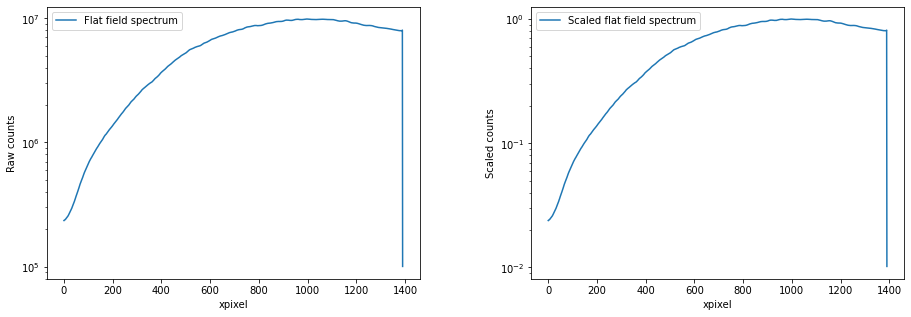

In [22]:
# Cell 7
#
# Plotting flat field spectrum

#%matplotlib notebook

# Extract the flat fieldspectrum
flatspectrum = np.sum(flat_data, axis=0)

#
# Normalize the flat field spectrum 
flatmaxpix = np.argmax(flatspectrum)      # pixel at which flat field is strongest, not used further right now
flatmaxvalue = np.max(flatspectrum)       # maximum flat field value
flatcorfactor = flatmaxvalue/flatspectrum # flat field correction factor


plt.figure(figsize=(14,4.5))
plt.subplot(121)
plt.plot(np.arange(inhdr['NAXIS1']), flatspectrum, label='Flat field spectrum')
plt.xlabel('xpixel')
plt.ylabel('Raw counts')
plt.yscale('log')
plt.legend()
plt.tight_layout()


plt.subplot(122)
plt.plot(np.arange(inhdr['NAXIS1']), 1/flatcorfactor, label='Scaled flat field spectrum')
plt.xlabel('xpixel')
plt.ylabel('Scaled counts')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.2,wspace=0.3)

plt.show()

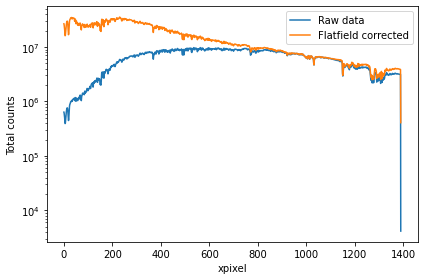

In [27]:
# Cell 8

# Correct the data using the normalized flat field

data_corrected = (image_data) * (flatcorfactor)

plt.figure()
plt.plot(np.arange(inhdr['NAXIS1']), np.sum(image_data, axis=0), label='Raw data')
plt.plot(np.arange(inhdr['NAXIS1']), np.sum(data_corrected, axis=0), label='Flatfield corrected')
plt.xlabel('xpixel')
plt.ylabel('Total counts')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()

<a id='step3'></a>
<h2> Step 3: Wavelength calibration </h2>

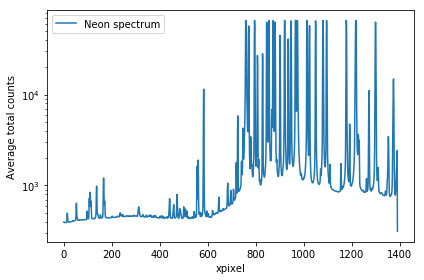

In [9]:
# Cell 9
# 
# Plot the Neon spectrum

# Added '/yrange' tothe counts/pixel so that the saturated lines can easily be seen
neonspectrum = np.sum(neon_data, axis=0)/yrange 

plt.figure()
plt.plot(np.arange(inhdr['NAXIS1']), neonspectrum, label='Neon spectrum')
plt.xlabel('xpixel')
plt.ylabel('Average total counts')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
# Cell 10
#
# First, we use an approximate dispersion relation to guess
# the approximate wavelength region covered by each pixel bin

# Find the xpixel location of the strongest line (maximum count)
# at around the mid y pixel.

# Find the approximately center of the 5400.5617 line and specify the begining and the range in xpixel in xl_center
startx = 550
xl_center = startx + np.argmax(wav_data[int(yrange_mid), :][startx:startx+100])
lstart = 5400.5616 - 2.537* (-1 + xl_center) - 0.000022 * (-1 + xl_center)**2
x_pixels = np.arange(inhdr_wav['NAXIS1'])

def wav_to_xpixel(x, wav):    
    return (lstart + 2.537* (-1+x)+0.000022 * (-1+x)**2) - wav

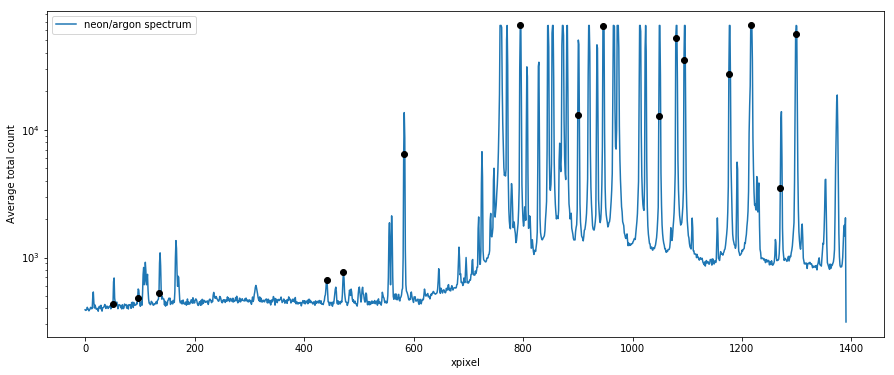

In [11]:
# Cell 11
# This is a list that contains the location of known spectral lines. 
# We will use these to correspond each pixel to the appropriate wavelength.


#cal_lines = {3948.979: 1., 4044.418: 1, 4158.590: 3, 4259.362: 3,   # The first 4 lines are Argon lines
#             5037.7512: 2, 5116.5032: 1, 5400.5616: 10,
#             5944.834: 100, 6217.281: 150, 6334.428: 100,
#             6598.953: 150, 6678.276: 90, 6717.043: 20, 
#             6929.467: 100, 7032.4131: 10, 7173.9381: 10,
#            7245.1666: 100}
cal_lines = {4044.418: 1, 4158.590: 3, 4259.362: 3,   # The first 3 lines are Argon lines
             5037.7512: 2, 5116.5032: 1, 5400.5616: 10,
             5944.834: 100, 6217.281: 150, 6334.428: 100,
             6598.953: 150, 6678.276: 90, 6717.043: 20, 
             6929.467: 100, 7032.4131: 10, 7173.9381: 10,
                          7245.1666: 100}

    
# Let's have a look at the calibration file!
plt.figure(figsize=(15,6))
plt.plot(np.arange(inhdr['NAXIS1']), wav_data[200, :], label='neon/argon spectrum')
#plt.plot(np.arange(inhdr['NAXIS1']), wav_data[0, :], label='neon/argon spectrum')
plt.xlabel('xpixel')
plt.ylabel('Average total count')
plt.yscale('log')
plt.legend()

# Find the approximate locations of the calibration lines
approx_centers = np.zeros(len(cal_lines), dtype=int)
for i, k in enumerate(cal_lines):
    approx_centers[i] = int(scipy.optimize.root(wav_to_xpixel, x0=[600], args=(k)).x[0])
    plt.plot((approx_centers[i]), wav_data[200, (approx_centers[i])], ls='', marker='o', c='k')
#    plt.plot((approx_centers[i]), wav_data[0, (approx_centers[i])], ls='', marker='o', c='k')
    
plt.show()

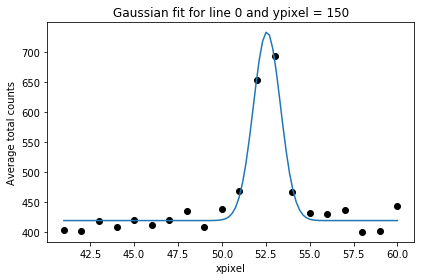

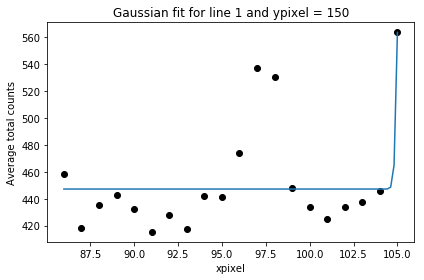

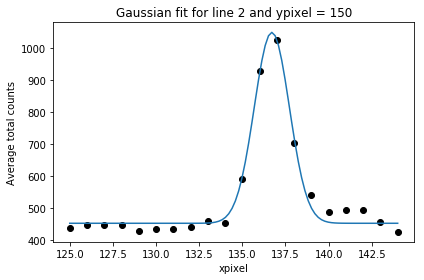

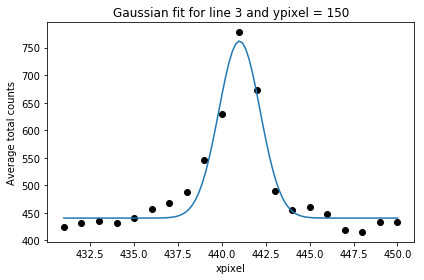

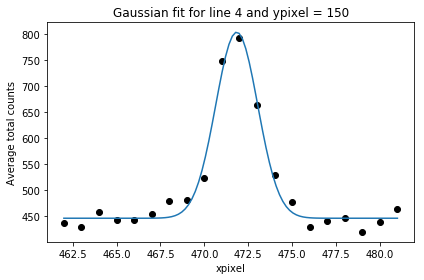

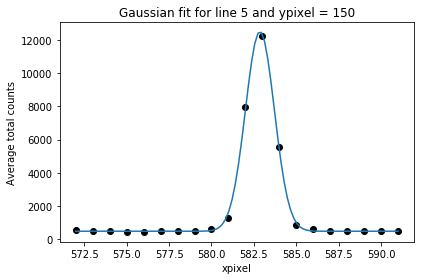

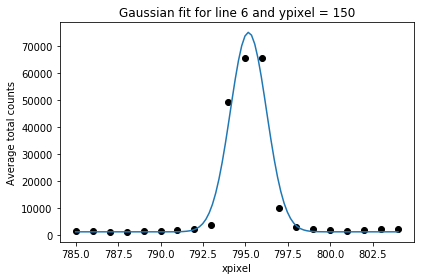

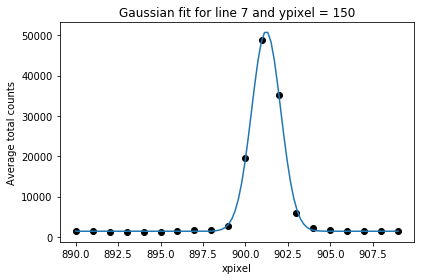

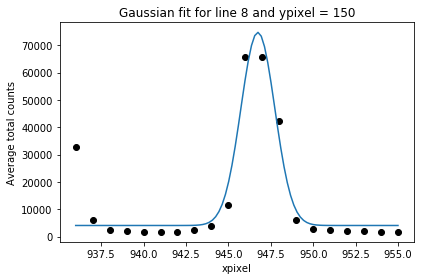

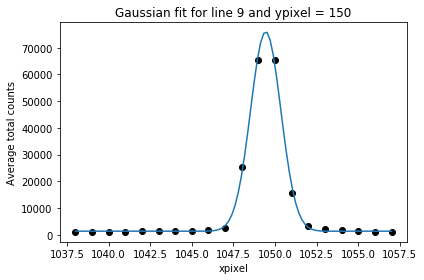

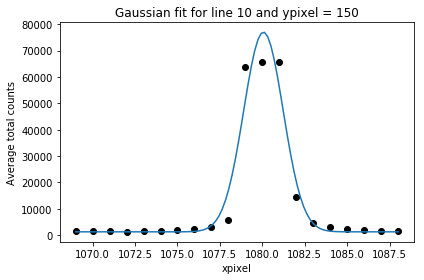

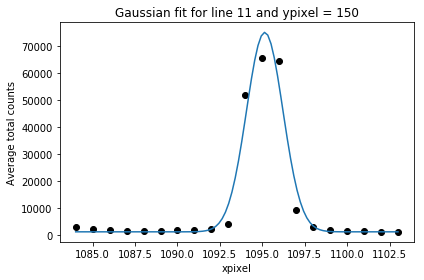

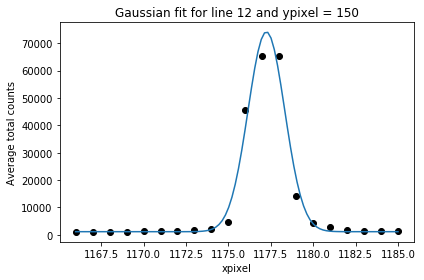

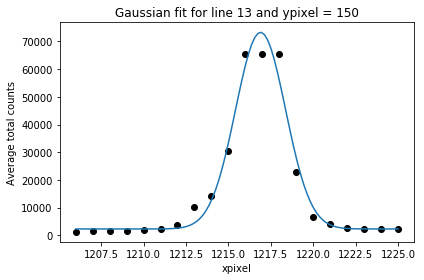

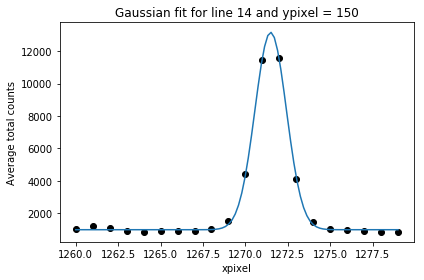

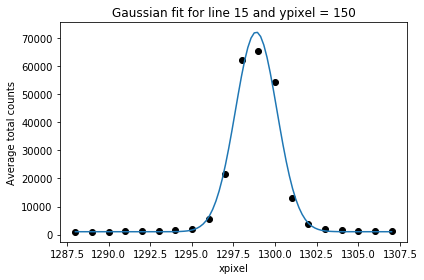

In [12]:
# Cell 12

# Define model function to be used to fit spectral lines:
def gauss(x, a, b, c, d):
    return d + a * np.exp(-1. * ((x - c)/b)**2)

x_range = 10

# For each ypixel: obtain a fit function lambda(x)
params = []
for ypix in np.arange(yrange):
    x_wav_array = []
    for yline in range(len(cal_lines)):
        # select region around line-estimate
        mid_line_x = approx_centers[yline]
        x = x_pixels[mid_line_x-x_range:mid_line_x+x_range]
        y = wav_data[ypix, :][mid_line_x-x_range:mid_line_x+x_range]
        approx_center = np.argmax(y) + mid_line_x - x_range
        
        # fit gaussian to line to locate linecenter precisely
        try:
            popt, cov = scipy.optimize.curve_fit(gauss, x, y, p0=[np.max(y), 2., approx_center, 100.])
        except:
            continue
    
        # add line center in pixels and corresponding wavelength to table 
        x_wav_array.append([popt[2], list(cal_lines.keys())[yline]])
        
        # inspect fit for selected values
        if ypix == yrange_mid:
            plt.figure()
            xplot = np.linspace(np.min(x), np.max(x), 100)
            plt.title('Gaussian fit for line {0} and ypixel = {1}'.format(yline, ypix))
            plt.plot(x, y, marker='o', ls='', c='k')
            plt.plot(xplot, gauss(xplot, *popt))
            plt.xlabel('xpixel')
            plt.ylabel('Average total counts')
            plt.tight_layout()
            plt.show()
    
    

    # After locating the lines at this ypixel value, make a fit function
    # for the entire wavelength range at this value
    x_wav_array = np.array(x_wav_array)
    y_wavcal = np.polyfit(x_wav_array[:, 0], x_wav_array[:, 1], 4)
    params.append(y_wavcal)

params = np.array(params)

The wavelength calibration function converts each x-y pixel to a wavelength value. The neon lines are slightly slanted, therefore the function depends on both x and y pixel. The function takes the following form (4-th order polynomial):<br>

$\lambda(x, y)$  = a0(y) + a1(y) x + a2(y) x$^2$ + a3(y) x$^3$ + a4(y) x$^4$



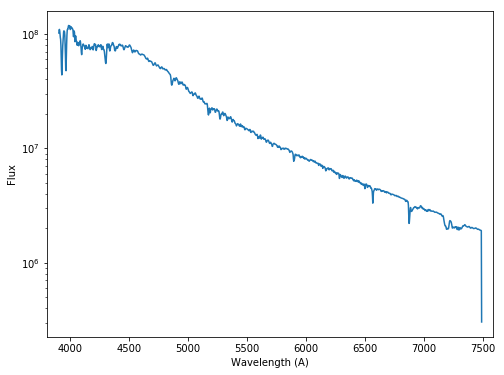

In [14]:
# Cell 13

# Apply wavelength calibration and plot final spectrum

# Now we can create a datacube in terms of wavelengths using the lambda(x, y) fit obtained above
objspec = []

# import scipy.interpolate
wavelengths = np.linspace(3793, 7376, 200)
# print wavelengths
for ypix in range(yrange):
    count = data_corrected[ypix, :]

    # function that converts the pixels to wavelength
    # for each ypixel using the previous fit
    pixel_to_wav = np.poly1d(params[ypix])   
    
    # save wavelength converted data for each ypixel
    conv_data = [pixel_to_wav(x_pixels), count]
    objspec.append(conv_data)

    
objspec = np.array(objspec)    # objspec contains wavelength - flux data for each ypixel
lambda_spec = objspec[:, 0][1]
fspec = np.sum(objspec[:, 1], axis=0)   # fspec contains the total flux (summed over ypixels)
#fnspec = fspec/np.max(fspec)            # fnspec contains the total normalised flux
fnspec = fspec

# Plot wavelength and flatfield calibrated spectrum
plt.figure(figsize=(8, 6))
plt.plot(lambda_spec, fnspec)
plt.xlabel('Wavelength (A)')
plt.ylabel('Flux')
plt.yscale('log') 
plt.xlim(np.min(lambda_spec)-100, np.max(lambda_spec)+100)
#plt.xlim(6800,6900)
plt.show()

In [50]:
# Cell 14

# Write output file

# Save calibrated data to a file if you (in case you want to import it in further analysis scripts)
# For MacOS and Linux
file_name = directory + "/sky.txt"

# For windows
#file_name = 'C:/Users/apo/Desktop/halfway_39s.txt'
np.savetxt(file_name, np.column_stack((lambda_spec, fnspec)),
            header= 'Wavelength (A) \t Flux')

print('Calibrated data is saved in file: {0}'.format(file_name))

Calibrated data is saved in file: /Users/rudy/Dropbox/Teaching/2020:2021/Astronomical Observation Lab/Data/Reduction software 2020/Data/LISA/20200925//sky.txt


<a id='step4'></a>
<h2>Step 4: Science analysis </h2>

Now the spectrum is calibrated and ready to use for your project science analysis (e.g., spectral line identification and calculating line velocities). Use the cells below to analyse the spectra. Some functions that may be useful are already provided.

In [ ]:
# Physical constants that might be useful

c = 299798        # speed of light (km/s)

# Rest wavelengths spectral lines (Angstrom)
L0_HAlpha = 6562.81;
L0_HBeta = 4861.332;
L0_HGamma= 4340.472;
L0_HDelta = 4101.734;
L0_LyAlpha = 1215;
L0_MgII = 2796.5;
L0_OII = 6276.61;

pi = np.pi

In [ ]:
def lambda_to_v(L0, L):
    '''
    Calculate redshift for selected spectral line.
    L0 and L are the rest wavelength and measured line center.
    Returns velocity in km/s.
    '''
    v = c * (L - L0)/L0
    return v


def redshift(L0, L):
    '''
    Calculate line redshift. L0 and L are the rest wavelength 
    and measured line center.
    '''
    z = L0/L - 1. 
    return z

<h3> Calculate redshift and relative velocity of the object using a single spectral line </h3>

This examples uses the H$_{\alpha}$ line, but you can choose other clearly identifyable line depending on the observer object. Note that the velocities need to be corrected for the motion of the Earth (and the solar system)! 

In [ ]:
# Select the wavelength region of the line
#lim_fit_left = L0_HAlpha - 10
#lim_fit_right = L0_HAlpha + 10

#L0_select = L0_OII
L0_select = L0_HAlpha

lim_fit_left = L0_select - 30
lim_fit_right = L0_select + 30



i_line = np.where((lambda_spec > lim_fit_left) & (lambda_spec < lim_fit_right))
wav_line = lambda_spec[i_line]
flux_line = fnspec[i_line]

# Plot the selected region for inspection. Adjust line region above if necessary.
plt.figure()
plt.plot(wav_line, flux_line)
plt.xlabel('Wavelength (A)')
plt.ylabel('Normalised flux')
plt.show()

In [ ]:
# Fit the line to obtain linecenter and calculate redshift & velocity
# Adjust the initial fit guess values (p0) to obtain a good fit

popt, pcov = scipy.optimize.curve_fit(gauss, wav_line, flux_line, p0=[np.max(flux_line), 10.0, L0_select, 0.])
errs = np.sqrt(np.diag(pcov))
halpha_wav = np.linspace(lim_fit_left, lim_fit_right, 100)

# Plot the line + fit for inspection
plt.figure()
plt.plot(wav_line, flux_line, label='Data')
plt.plot(halpha_wav, gauss(halpha_wav, *popt), label='Fit')

plt.xlabel('Wavelength (A)')
plt.ylabel('Normalised flux')
plt.legend()
plt.show()

# Print results
z = redshift(L0_select, popt[2])
z_err = redshift(L0_select, popt[2]+errs[2]) - z
v = z*c
v_err = z_err*c
print('Wavelength center: \t {0} +- {1} Angstrom'.format(popt[2], errs[2]))
print('Line offset: \t {0} Angstrom' .format(popt[2]-L0_select))
print('Linewidth: \t \t {0} +- {1} Angstrom'.format(popt[1], errs[1]))
print('Redshift: \t \t {0} +- {1} '.format(z, z_err))
print('Velocity: \t \t {0} +- {1} km/s'.format(v, v_err))